In [3]:
import pandas as pd
import numpy as np
from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
columns = ['place_code','destination_code','date','review']
reviews = pd.read_csv('captured_reviews.csv',names=columns).dropna()

In [59]:
reviews.head(20)

,place_code,destination_code,date,review
2,g1006573,d1102010,February 13 2016,This is an experience that should not be misse...
4,g1006573,d1102010,February 13 2016,The horses are well cared for and well behaved...
5,g1006573,d1102010,February 13 2016,I had the most wonderful time riding with Pamp...
6,g1006573,d1102010,February 13 2016,We have horses at home and wanted to ride on a...
10,g1006573,d1102010,February 13 2016,The guide and ride was great. Communication wa...
15,g1006573,d1383025,February 17 2016,I enjoyed my private beach ride along the beac...
16,g1006573,d1383025,February 17 2016,Definitely worth it! Was one of the best exper...
19,g1006573,d1383025,February 17 2016,This was the best Swimming with the horse we h...
25,g1006573,d1415235,March 4 2016,We didn't have time to stay and swim with the ...
26,g1006573,d1415235,March 3 2016,It was very fun and safe. My daughter loved it...


In [75]:
reviews['place_code'].value_counts()

g147249     285
g147293     168
g147313     154
g147312     124
g147365     122
g147366     121
g259440     107
g488162     104
g147342      99
g147367      99
g317146      76
g666621      64
g147264      43
g1183194     43
g147345      34
g1006573     33
g147343      18
g666611      15
g147248      13
g3176298     12
g147294      11
g652398       9
g616286       7
g2194940      7
g1310451      6
g147344       6
g147263       5
g1183257      4
g946307       4
g1183186      4
g147251       4
g147290       4
g147311       3
g8843616      3
g1722406      3
g1959515      1
dtype: int64

In [76]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [77]:
reviews.describe()

,place_code,destination_code,date,review
count,1815,1815,1815,1815
unique,36,223,37,1732
top,g147249,d150447,2016-03-10 00:00:00,I was amazed by Romance of the Seas captain an...
freq,285,63,113,2
first,NaN,NaN,2016-02-03 00:00:00,NaN
last,NaN,NaN,2016-03-10 00:00:00,NaN


# LDA

### Use the 'text-only' version of the parsed reviews to explore if there are any significant topics that are relevant, essentially trying to discover what people are talking about in the reviews about the different destinations.

In [78]:
cv = CountVectorizer(binary=False, stop_words='english', min_df=3, max_features=5)

In [80]:
review_text_only = [unicode(review_text, errors='ignore') for review_text in open('captured_reviews_text_only.txt', 'r')]
docs = cv.fit_transform(review_text_only)
id2word = dict(enumerate(cv.get_feature_names()))
corpus = Sparse2Corpus(docs, documents_columns = False)
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)
lda_model.show_topics()

[(0,
  u'0.384*beach + 0.267*nice + 0.266*water + 0.058*great + 0.025*beautiful'),
 (1,
  u'0.679*nice + 0.191*beach + 0.112*beautiful + 0.015*great + 0.004*water'),
 (2,
  u'0.531*water + 0.175*great + 0.124*nice + 0.087*beautiful + 0.082*beach'),
 (3,
  u'0.510*great + 0.420*beautiful + 0.040*water + 0.018*nice + 0.011*beach'),
 (4,
  u'0.836*great + 0.123*beach + 0.023*water + 0.017*nice + 0.001*beautiful'),
 (5,
  u'0.838*beach + 0.125*beautiful + 0.019*great + 0.011*water + 0.007*nice'),
 (6,
  u'0.497*beach + 0.317*water + 0.089*beautiful + 0.082*great + 0.014*nice'),
 (7,
  u'0.565*beautiful + 0.189*beach + 0.162*great + 0.079*water + 0.005*nice'),
 (8,
  u'0.393*great + 0.257*beautiful + 0.220*nice + 0.120*water + 0.010*beach'),
 (9,
  u'0.367*beach + 0.322*beautiful + 0.258*water + 0.045*great + 0.009*nice')]

# K-means

In [81]:
column_names = reviews.columns
scale = StandardScaler(with_mean=False)
X_scale = scale.fit_transform(docs)

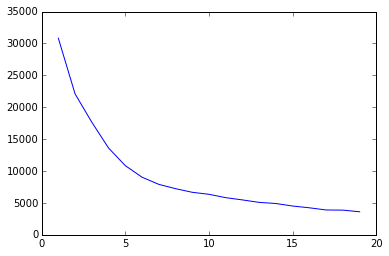

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
for n in range(1,20):
    km = KMeans(n_clusters=n)
    km.fit(X_scale)
    x.append(n)
    y.append(km.inertia_)
plt.plot(x, y)

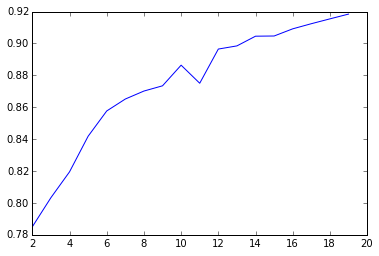

In [83]:
from sklearn.metrics import silhouette_score
x = []
y = []
for n in range(2,20):
    km2 = KMeans(n_clusters=n)
    centers = km2.fit_predict(X_scale)
    x.append(n)
    y.append(silhouette_score(X_scale, centers))
plt.plot(x, y)